# Lab Report
*Jakub Skalski, 314007*

In [2]:
library("ellipse")
library("ggplot2")

confidence.ellipse = function(mu, sigma, levels=seq(0, 1, 0.1), rescale = TRUE) {
	diago = eigen(sigma)
	vectors = diago$vectors %*% diag(sqrt(diago$values)) + mu
	arrow.size = arrow(length=unit(0.3, 'cm'))

	plotz = ggplot() + geom_path() + theme_bw() +
		geom_segment(aes(x=mu[1], y=mu[2], xend=vectors[1,1], yend=vectors[2,1]), arrow = arrow.size, color = "darkred") +
		geom_segment(aes(x=mu[1], y=mu[2], xend=vectors[1,2], yend=vectors[2,2]), arrow = arrow.size, color = "darkblue")
	
	if (!rescale)
		plotz = plotz + coord_equal()
		
	for (level in levels) {
		ellipse_data1 = ellipse(x = sigma, centre = mu, level = level)
		plotz = plotz + geom_path(data = ellipse_data1, aes(x, y), color = "black", alpha=1-level)
	}

	return(plotz)
}

## Problem 1
$$
A = \begin{bmatrix}
3 & -1\\
-1 & 3
\end{bmatrix}	
$$

1. Since $A = A^T$ A is symmetric.
2. After solving $det(A - λI) = 0$, we obtain $λ_1 = 2, λ_2 = 4$ and their corresponding eigenvectors $v_1 = \begin{bmatrix} 1\\1 \end{bmatrix}, v_2 = \begin{bmatrix} 1\\-1 \end{bmatrix}$
And so the decomposition is such that $P = \frac{1}{\sqrt{2}}\begin{bmatrix} v_1 & v_2 \end{bmatrix}$ and $Λ = diag(λ_1, λ_2)$.
3. $A = \begin{bmatrix} 1 & 1\\1 & 1 \end{bmatrix} +  \begin{bmatrix} 2 & -2\\-2 & 2 \end{bmatrix}$
4. $\sqrt{A} = \frac{1}{2}\begin{bmatrix} \sqrt{2}+2 & \sqrt{2}-2\\\sqrt{2}-2 & \sqrt{2}+2 \end{bmatrix}$

## Problem 2

1. Since $e_ie_i^T = 1$ and $e_ie_j^T = 0$ for  $i\ne j$

	$P^TP = \begin{bmatrix} e_1^T \\ - \\ ... \\ - \\e_n^T \end{bmatrix} \begin{bmatrix} e_1 & | & ... & | & e_n \end{bmatrix} = \begin{bmatrix} e_1^Te_1  & ...  & e_1^Te_n \\ ... & ... & ... \\ e_n^Te_1 & ... & e_n^Te_n  \end{bmatrix} = I$

2. We can prove this by induction. Assume $det(Λ_n) = \prod_i^n{λ_i}$ and show that it holds for $n+1$ by $n+1$ matrix too.
	To that end we perform laplace expansion on the n+1-th row:
	$$det(Λ_{n+1}) = det(Λ_n) * λ_{n+1} + 0 ... + 0$$ 
	Therefore, by our inductive hypothesis,  $det(Λ_{n+1}) = \prod_i^{n+1}{λ_i}$.
3. Using the fact 2. and $det(P) = det(P^T) = ±1$ we have:
$$det(A) = det(PΛP^T) = det(P) det(Λ) det(P^T) = det(Λ)$$
4. Suppose $Λ = diag(λ_1, λ_2, ... , λ_n)$ then:
$$Λ^{-1} = diag(λ_1^{-1}, λ_2^{-1}, ..., λ_n^{-1})$$
5. It suffices to show that $AA^{-1} = I$:
$$AA^{-1} = (PΛP^T)(PΛ^{-1}P^T) = PΛΛ^{-1}P^T = PP^T = I$$

In [18]:
# 6.
A = matrix(c(3, -1, -1, 3), nrow=2)
e = eigen(A)

# 6.1
cat("P * P^T =\n")
print(round(e$vectors %*% t(e$vectors), 16))

# 6.2
cat("\ndet(A) =", det(A), "\n")
cat("Π(λi) =", prod(e$values), "\n\n")

# 6.3
cat("det(Λ) =", det(diag(e$values)))

# 6.5
cat("\nTest the inverse\n")
print(round(A %*% e$vectors %*% diag(1/e$values) %*% t(e$vectors), 16))

P * P^T =
     [,1] [,2]
[1,]    1    0
[2,]    0    1

det(A) = 8 
Π(λi) = 8 

det(Λ) = 8
Test the inverse
     [,1] [,2]
[1,]    1    0
[2,]    0    1


## Problem 3

The joint probability density function of p normal distributions with mean vector $\boldsymbol{\mu}$ and covariance matrix $\boldsymbol{\Sigma}$ is given by:
$$
f(\mathbf{x} | \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{\sqrt{(2\pi)^p |\boldsymbol{\Sigma}|}} \exp\left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) \right)
$$

and is characterized by $\frac{p(p+1)}{2}$ parameters.

In [27]:
µ = c(3343, 49.8)
𝞢 = matrix(c(528**2, 0.75, 0.75, 2.5**2), nrow=2)
e = eigen(𝞢); e

eigen() decomposition
$values
[1] 2.787840e+05 6.249998e+00

$vectors
              [,1]          [,2]
[1,] -1.000000e+00  2.690315e-06
[2,] -2.690315e-06 -1.000000e+00


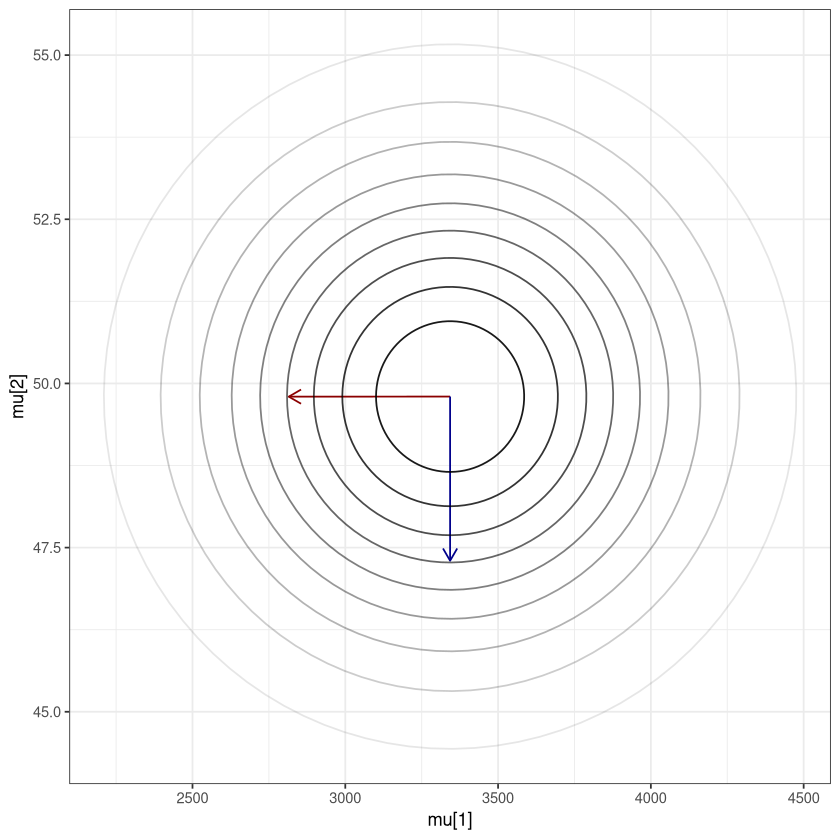

In [29]:
confidence.ellipse(µ, 𝞢)

TODO: comment